<a href="https://colab.research.google.com/github/WojtekSza/AirBnB_singapur/blob/main/PRBD_data_preparation_SINGAPORE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROJEKT ZALICZENIOWY
MIASTO SINGAPUR
WOJCIECH SZANIAWSKI

In [216]:
import numpy as np
import pandas as pd
import re

---
# Zadanie 1.

Pobieranie danych ze źródła:

In [217]:
url='http://data.insideairbnb.com/singapore/sg/singapore/2021-10-28/data/listings.csv.gz'

In [218]:
data=pd.read_csv(url)

In [219]:
data_clean=data.copy()

---
# Zadanie 2.

Poznanie danych (liczba i typ zmiennych ,rozmiar, czasochłonność)

In [220]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4123 non-null   int64  
 1   listing_url                                   4123 non-null   object 
 2   scrape_id                                     4123 non-null   int64  
 3   last_scraped                                  4123 non-null   object 
 4   name                                          4123 non-null   object 
 5   description                                   3990 non-null   object 
 6   neighborhood_overview                         2655 non-null   object 
 7   picture_url                                   4123 non-null   object 
 8   host_id                                       4123 non-null   int64  
 9   host_url                                      4123 non-null   o

In [221]:
len(data_clean)

4123

Ilość wierszy 4123, rozmiar ~ 2.3 MB
Tak wiec baza danych nie jest duża więc czas procesowania danych będzie szybki

---
# Zadanie 3.

Wyświetlanie próbki surowych danych:

In [222]:
data_clean.head(5)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,50646,https://www.airbnb.com/rooms/50646,20211028055647,2021-10-28,Pleasant Room along Bukit Timah,Fully furnished bedroom with a nice view on th...,The serenity & quiet surrounding makes it an i...,https://a0.muscache.com/pictures/36342984/670d...,227796,https://www.airbnb.com/users/show/227796,Sujatha,2010-09-08,"Singapore, Singapore","I am a working professional, living in Singapo...",NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/8fd2c...,https://a0.muscache.com/im/pictures/user/8fd2c...,Bukit Timah,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,"Singapore, Singapore",Bukit Timah,Central Region,1.33432,103.78521,Private room in rental unit,Private room,2,NaN,1 bath,1.0,1.0,"[""Elevator"", ""Long term stays allowed"", ""Cable...",$80.00,90,730,90.0,90.0,730.0,730.0,90.0,730.0,NaN,t,30,60,90,365,2021-10-28,18,0,0,2014-10-14,2014-07-08,4.56,4.72,4.78,4.78,4.94,4.72,4.50,NaN,f,1,0,1,0,0.21
1,71609,https://www.airbnb.com/rooms/71609,20211028055647,2021-10-28,Ensuite Room (Room 1 & 2) near EXPO,For 3 rooms.Book room 1&2 and room 4<br /><br ...,NaN,https://a0.muscache.com/pictures/24453191/3580...,367042,https://www.airbnb.com/users/show/367042,Belinda,2011-01-29,Singapore,Hi My name is Belinda -Housekeeper \r\n\r\nI w...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/367042/profil...,https://a0.muscache.com/im/users/367042/profil...,Tampines,8.0,8.0,"['email', 'phone', 'reviews', 'manual_offline'...",t,t,NaN,Tampines,East Region,1.34537,103.95887,Private room in villa,Private room,6,NaN,1 private bath,2.0,3.0,"[""TV"", ""Hot tub"", ""Washer"", ""Shampoo"", ""Dedica...",$177.00,90,1125,90.0,90.0,1125.0,1125.0,90.0,1125.0,NaN,t,30,60,90,365,2021-10-28,20,0,0,2015-10-05,2019-12-28,4.44,4.37,4.00,4.63,4.78,4.26,4.32,NaN,t,4,0,4,0,0.27
2,71896,https://www.airbnb.com/rooms/71896,20211028055647,2021-10-28,B&B Room 1 near Airport & EXPO,<b>The space</b><br />Vocational Stay Deluxe B...,NaN,https://a0.muscache.com/pictures/2440674/ac4f4...,367042,https://www.airbnb.com/users/show/367042,Belinda,2011-01-29,Singapore,Hi My name is Belinda -Housekeeper \r\n\r\nI w...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/367042/profil...,https://a0.muscache.com/im/users/367042/profil...,Tampines,8.0,8.0,"['email', 'phone', 'reviews', 'manual_offline'...",t,t,NaN,Tampines,East Region,1.34754,103.95958,Private room in residential home,Private room,3,NaN,Shared half-bath,1.0,1.0,"[""TV"", ""Hot tub"", ""Washer"", ""Shampoo"", ""Coffee...",$81.00,90,1125,90.0,90.0,1125.0,1125.0,90.0,1125.0,NaN,t,30,60,90,365,2021-10-28,24,0,0,2015-08-14,2014-12-10,4.16,4.22,4.09,4.43,4.43,4.17,4.04,NaN,t,4,0,4,0,0.32
3,71903,https://www.airbnb.com/ro

Na podstawie wstępnej oceny możemy wykonać usunięcie kolumn, które nie będą przynosić wartości dla analizy

In [223]:
data_clean2=data_clean[['host_is_superhost', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'room_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'price','review_scores_rating']]

Dane po wstępnej obróbce:

In [224]:
data_clean2.head(5)

,host_is_superhost,neighbourhood_group_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,price,review_scores_rating
0,f,Central Region,1.33432,103.78521,Private room,2,1 bath,1.0,1.0,$80.00,4.56
1,f,East Region,1.34537,103.95887,Private room,6,1 private bath,2.0,3.0,$177.00,4.44
2,f,East Region,1.34754,103.95958,Private room,3,Shared half-bath,1.0,1.0,$81.00,4.16
3,f,East Region,1.34531,103.96100,Private room,3,Shared half-bath,1.0,2.0,$81.00,4.42
4,f,Central Region,1.29015,103.80814,Private room,1,NaN,1.0,1.0,$52.00,4.39


---
# Zadanie 4.

Weryfikacja typów zmiennych:

In [225]:
data_clean2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   host_is_superhost             4115 non-null   object 
 1   neighbourhood_group_cleansed  4123 non-null   object 
 2   latitude                      4123 non-null   float64
 3   longitude                     4123 non-null   float64
 4   room_type                     4123 non-null   object 
 5   accommodates                  4123 non-null   int64  
 6   bathrooms_text                4094 non-null   object 
 7   bedrooms                      3664 non-null   float64
 8   beds                          3859 non-null   float64
 9   price                         4123 non-null   object 
 10  review_scores_rating          2308 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 354.4+ KB


In [226]:
data_clean2.host_is_superhost.unique()

array(['f', 't', nan], dtype=object)

Korekta danych "host_is_superhost" na kategoryczne 0 - false i 1 - true.





In [227]:
data_clean2.host_is_superhost=data_clean2.host_is_superhost.str.replace('f','0').str.replace('t','1').astype(np.float64)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [228]:
host_is_superhost_label={0:'false',1:'true'}

In [229]:
data_clean2.host_is_superhost.unique()

array([ 0.,  1., nan])

In [230]:
data_clean2.neighbourhood_group_cleansed.unique()

array(['Central Region', 'East Region', 'North-East Region',
       'West Region', 'North Region'], dtype=object)

Korekta danych "neighbourhood_group_cleansed" na kategoryczne 0:'Central Region', 1:'East Region', 2:'North-East Region',
       3:'West Region', 4:'North Region'

In [231]:
data_clean2.neighbourhood_group_cleansed=data_clean2.neighbourhood_group_cleansed.str.replace(r'Central Region','0', regex=True).replace(r'^East Region','1', regex=True).replace('North-East Region','2').replace('West Region','3').replace('North Region','4').astype(np.int8)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [232]:
data_clean2.neighbourhood_group_cleansed.unique()

array([0, 1, 2, 3, 4], dtype=int8)

In [233]:
neighbourhood_label={0:'Central Region', 1:'East Region', 2:'North-East Region',
       3:'West Region', 4:'North Region'}

In [234]:
data_clean2.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

Korekta danych "room_type" na kategoryczne 0:'Private room', 1:'Entire home/apt', 2:'Shared room', 3:'Hotel room'

In [235]:
data_clean2.room_type=data_clean2.room_type.str.replace('Private room','0').str.replace('Entire home/apt','1').str.replace('Shared room','2').str.replace('Hotel room','3').astype(np.int8)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [236]:
data_clean2.room_type.unique()

array([0, 1, 2, 3], dtype=int8)

In [237]:
room_type_label={0:'Private room', 1:'Entire home/apt', 2:'Shared room', 3:'Hotel room'}

In [238]:
data_clean2.bathrooms_text.unique()

array(['1 bath', '1 private bath', 'Shared half-bath', nan,
       '1.5 shared baths', '1 shared bath', '0 baths', '2 shared baths',
       '4 shared baths', '2 baths', 'Private half-bath', '3 baths',
       '2.5 baths', '4 baths', '3 shared baths', '1.5 baths', '8 baths',
       '0 shared baths', 'Half-bath', '3.5 baths', '2.5 shared baths',
       '5 baths', '6 baths', '5 shared baths', '7.5 shared baths',
       '7 shared baths', '8 shared baths', '6 shared baths',
       '12.5 shared baths', '4.5 shared baths', '4.5 baths',
       '8.5 shared baths', '8.5 baths', '9 shared baths', '10 baths',
       '10 shared baths', '21 shared baths', '3.5 shared baths',
       '16 shared baths', '16 baths', '13 baths', '12 shared baths',
       '12 baths', '13 shared baths', '5.5 shared baths'], dtype=object)

Korekta zmiennych "bathrooms_text" na liczbowe:

In [239]:
data_clean2.bathrooms_text = np.where(data_clean["bathrooms_text"].str.lower().str.contains('half'),0.5, data_clean["bathrooms_text"].str.split().str[0]).astype(np.float64)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [240]:
data_clean2.bathrooms_text.unique()

array([ 1. ,  0.5,  1.5,  0. ,  2. ,  4. ,  3. ,  2.5,  8. ,  3.5,  5. ,
        6. ,  7.5,  7. , 12.5,  4.5,  8.5,  9. , 10. , 21. , 16. , 13. ,
       12. ,  5.5])

Korekta nazwy kolumn na krótsza formę:

In [241]:
data_clean2=data_clean2.rename(columns={"bathrooms_text": "bathrooms","neighbourhood_group_cleansed":'neighbourhood'})

Korekta kolumny "price" na format liczbowy

In [242]:
data_clean2.price=data_clean2.price.str.replace('$','').str.replace(',','').astype(np.float64)

In [243]:
data_clean2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   host_is_superhost     4115 non-null   float64
 1   neighbourhood         4123 non-null   int8   
 2   latitude              4123 non-null   float64
 3   longitude             4123 non-null   float64
 4   room_type             4123 non-null   int8   
 5   accommodates          4123 non-null   int64  
 6   bathrooms             4123 non-null   float64
 7   bedrooms              3664 non-null   float64
 8   beds                  3859 non-null   float64
 9   price                 4123 non-null   float64
 10  review_scores_rating  2308 non-null   float64
dtypes: float64(8), int64(1), int8(2)
memory usage: 298.1 KB


Próbka danych po poprawie typu i kategorii danych:

In [244]:
data_clean2.head(5)

,host_is_superhost,neighbourhood,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,beds,price,review_scores_rating
0,0.0,0,1.33432,103.78521,0,2,1.0,1.0,1.0,80.0,4.56
1,0.0,1,1.34537,103.95887,0,6,1.0,2.0,3.0,177.0,4.44
2,0.0,1,1.34754,103.95958,0,3,0.5,1.0,1.0,81.0,4.16
3,0.0,1,1.34531,103.96100,0,3,0.5,1.0,2.0,81.0,4.42
4,0.0,0,1.29015,103.80814,0,1,0.5,1.0,1.0,52.0,4.39


---
# Zadanie 5.

Podsumowanie zmiennych numerycznych opisujących zbiór:

In [245]:
len(data_clean2)

4123

In [246]:
data_clean2.describe()

,host_is_superhost,neighbourhood,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,beds,price,review_scores_rating
count,4115.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,3664.000000,3859.000000,4123.000000,2308.000000
mean,0.207533,0.460587,1.311544,103.845565,0.638613,2.861509,1.530439,1.325600,1.904379,182.207858,4.470273
std,0.405590,1.043027,0.031750,0.043030,0.756908,2.193011,1.296987,0.686948,2.508137,383.103670,0.897278
min,0.000000,0.000000,1.245350,103.648280,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,1.290415,103.834170,0.000000,2.000000,1.000000,1.000000,1.000000,68.000000,4.380000
50%,0.000000,0.000000,1.308110,103.847450,1.000000,2.000000,1.000000,1.000000,1.000000,119.000000,4.750000
75%,0.000000,0.000000,1.318220,103.861710,1.000000,4.000000,2.000000,1.000000,2.000000,189.000000,5.000000
max,1.000000,4.000000,1.453910,103.969660,3.000000,16.000000,21.000000,8.000000,58.000000,10286.000000,5.000000


In [247]:
data_clean2.median()

host_is_superhost         0.00000
neighbourhood             0.00000
latitude                  1.30811
longitude               103.84745
room_type                 1.00000
accommodates              2.00000
bathrooms                 1.00000
bedrooms                  1.00000
beds                      1.00000
price                   119.00000
review_scores_rating      4.75000
dtype: float64

Podsumowanie zmiennych kategorycznych opisujących zbiór:

In [248]:
data_clean2["host_is_superhost"].value_counts()

0.0    3261
1.0     854
Name: host_is_superhost, dtype: int64

In [249]:
host_is_superhost_label

{0: 'false', 1: 'true'}

In [250]:
data_clean2["neighbourhood"].value_counts()

0    3306
3     291
1     264
2     143
4     119
Name: neighbourhood, dtype: int64

In [251]:
neighbourhood_label

{0: 'Central Region',
 1: 'East Region',
 2: 'North-East Region',
 3: 'West Region',
 4: 'North Region'}

In [252]:
data_clean2["room_type"].value_counts()

0    2013
1    1769
3     182
2     159
Name: room_type, dtype: int64

In [253]:
room_type_label

{0: 'Private room', 1: 'Entire home/apt', 2: 'Shared room', 3: 'Hotel room'}

---
# Zadanie 6.

Ocena zbioru danych pod kątem barkujących wartości:

In [254]:
data_clean2.isnull().sum()

host_is_superhost          8
neighbourhood              0
latitude                   0
longitude                  0
room_type                  0
accommodates               0
bathrooms                  0
bedrooms                 459
beds                     264
price                      0
review_scores_rating    1815
dtype: int64

Wizualizacja brakujących danych (kolor jasny oznacza barkujące wartości, kolor czarny oznacza niebrakujące wartości)

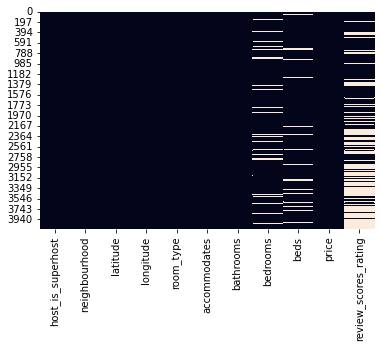

In [255]:
import seaborn as sns
sns.heatmap(data_clean2.isnull(), cbar=False)

Brakujące wartośc dla kolumny "host_is_superhost":

In [256]:
data_clean2_null_host_is_superhost=data_clean2[data_clean2["host_is_superhost"].isnull()]

In [257]:
data_clean2_null_host_is_superhost.head(5)

,host_is_superhost,neighbourhood,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,beds,price,review_scores_rating
1965,NaN,0,1.28427,103.83279,1,6,1.0,3.0,3.0,202.0,4.38
1966,NaN,0,1.28153,103.83024,1,4,1.0,2.0,2.0,189.0,5.00
1967,NaN,0,1.28266,103.83434,1,2,1.5,1.0,1.0,150.0,4.51
2038,NaN,0,1.28289,103.83225,1,6,1.0,3.0,3.0,202.0,5.00
2473,NaN,0,1.28302,103.83199,1,3,1.0,2.0,3.0,406.0,NaN


Brakujące wartośc dla kolumny "bedrooms":

In [258]:
data_clean2_null_bedrooms=data_clean2[data_clean2["bedrooms"].isnull()]

In [259]:
data_clean2_null_bedrooms.head(5)

,host_is_superhost,neighbourhood,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,beds,price,review_scores_rating
10,0.0,0,1.28652,103.81225,0,1,2.0,NaN,1.0,49.0,4.67
50,0.0,1,1.32183,103.91729,1,4,1.0,NaN,2.0,185.0,5.00
120,1.0,0,1.31600,103.82810,1,2,1.0,NaN,1.0,174.0,4.75
128,0.0,2,1.38763,103.86942,1,2,1.0,NaN,2.0,106.0,4.22
129,1.0,0,1.29489,103.85401,0,2,1.0,NaN,1.0,164.0,4.77


Brakujące wartośc dla kolumny "beds":

In [260]:
data_clean2_null_beds=data_clean2[data_clean2["beds"].isnull()]

In [261]:
data_clean2_null_beds.head(5)

,host_is_superhost,neighbourhood,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,beds,price,review_scores_rating
5,0.0,0,1.28836,103.81144,0,1,0.5,1.0,NaN,40.0,4.55
17,0.0,2,1.36288,103.86575,0,2,1.5,1.0,NaN,80.0,4.69
52,0.0,0,1.30720,103.86359,0,1,3.0,1.0,NaN,59.0,4.14
64,0.0,0,1.31207,103.85666,0,1,2.0,1.0,NaN,49.0,3.00
133,1.0,0,1.34081,103.84165,0,2,2.0,1.0,NaN,76.0,4.25


Brakujące wartośc dla kolumny "review_scores_rating":

In [262]:
data_clean2_null_beds=data_clean2[data_clean2["review_scores_rating"].isnull()]

In [263]:
data_clean2_null_beds.head(5)

,host_is_superhost,neighbourhood,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,beds,price,review_scores_rating
13,0.0,0,1.31374,103.90190,0,2,1.0,1.0,1.0,65.0,NaN
18,0.0,1,1.34510,103.95647,0,2,1.0,1.0,1.0,94.0,NaN
19,0.0,1,1.34816,103.93238,0,2,1.0,1.0,1.0,37.0,NaN
22,0.0,0,1.30096,103.85206,0,2,2.0,1.0,1.0,162.0,NaN
24,0.0,2,1.36926,103.87312,0,1,1.0,1.0,1.0,26.0,NaN


WNIOSEK: Barkujace wartości występują losowo, gdzie pozostałe kolumny zawierają przydatne informacje. Usuwanie całych wierzy z barkującymi danymi przyniosłoby zbyt duża utratę wartościowych informacji.

---
# Zadanie 7.


Wizualizacja rozkładu danych (histogramy)

In [264]:
data_clean2.columns

Index(['host_is_superhost', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'review_scores_rating'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe928561dd0>,
      dtype=object)

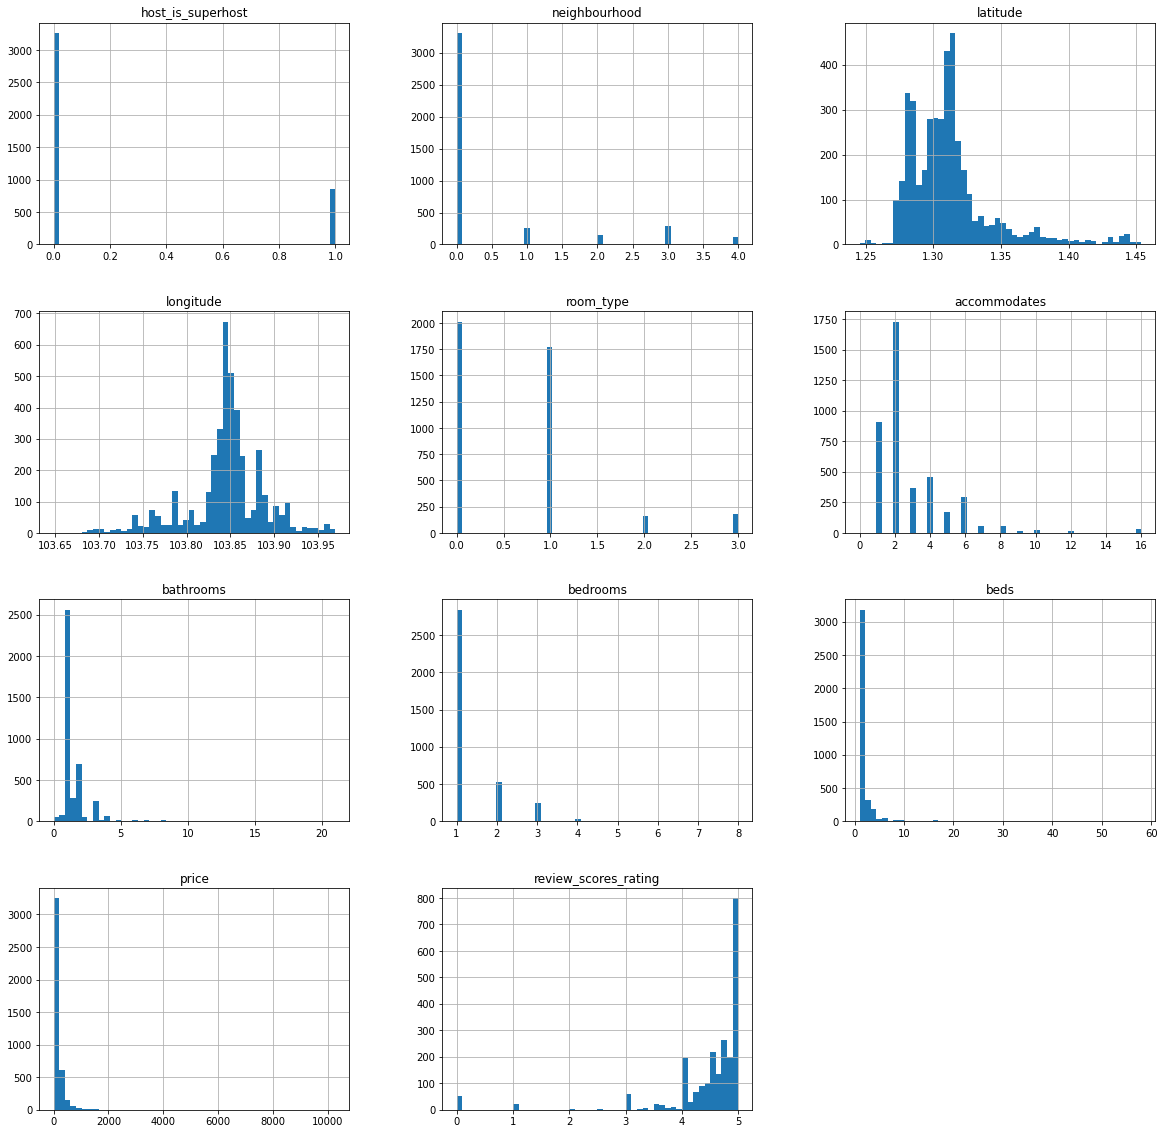

In [265]:
data_clean2.hist(bins=50,figsize=(20, 20))

Charakteryzacja danych pod względem parametrów skew i kurtosis.

In [266]:
data_clean2.skew()

host_is_superhost        1.442880
neighbourhood            2.199315
latitude                 1.868353
longitude               -0.652242
room_type                1.319201
accommodates             2.638904
bathrooms                5.870471
bedrooms                 2.534642
beds                     9.140046
price                   14.909656
review_scores_rating    -3.501535
dtype: float64

In [267]:
data_clean2.kurtosis()

host_is_superhost         0.081941
neighbourhood             3.515558
latitude                  4.618345
longitude                 1.832213
room_type                 1.861077
accommodates             10.416812
bathrooms                54.775567
bedrooms                  8.518869
beds                    132.270053
price                   297.765502
review_scores_rating     13.630062
dtype: float64

In [268]:
data_clean2.agg(['kurtosis', 'skew']).T

,kurtosis,skew
host_is_superhost,0.081941,1.442880
neighbourhood,3.515558,2.199315
latitude,4.618345,1.868353
longitude,1.832213,-0.652242
room_type,1.861077,1.319201
accommodates,10.416812,2.638904
bathrooms,54.775567,5.870471
bedrooms,8.518869,2.534642
beds,132.270053,9.140046
price,297.765502,14.909656


Wniosek: Wszystkie dane przedstawiaja rozkład oddalony od rozkładu normalnego.

---
# Zadanie 8.

Proces czyszczenia danych:

In [269]:
data_clean2.isnull().sum()

host_is_superhost          8
neighbourhood              0
latitude                   0
longitude                  0
room_type                  0
accommodates               0
bathrooms                  0
bedrooms                 459
beds                     264
price                      0
review_scores_rating    1815
dtype: int64

**host_is_superhost**          

Zastępowanie wartości brakujący w "host_is_superhost" wartościami 0 - false.

In [270]:
data_clean2.host_is_superhost.median()

0.0

In [271]:
data_clean2.host_is_superhost.mean()

0.20753341433778857

In [272]:
data_clean2.host_is_superhost.fillna(0, inplace=True)

In [273]:
data_clean2.host_is_superhost.median()

0.0

In [274]:
data_clean2.host_is_superhost.mean()

0.2071307300509338

WNIOSEK: Mały wpływ czyszczenia danych na paramtery MEAN i MEDIAN

**BEDROOMS**

Zastępowanie wartości brakujący  mediana



In [275]:
data_clean2.bedrooms.median()

1.0

In [276]:
data_clean2.bedrooms.mean()

1.3256004366812226

In [277]:
data_clean2.bedrooms.fillna(data_clean2.bedrooms.median(), inplace=True)

In [278]:
data_clean2.bedrooms.median()

1.0

In [279]:
data_clean2.bedrooms.mean()

1.2893524132912928

WNIOSEK: Akceptowalny wpływ czyszczenia danych na paramtery MEAN i MEDIAN

**BEDS**




Zastępowanie wartości brakujący mediana



In [280]:
data_clean2.beds.median()

1.0

In [281]:
data_clean2.beds.mean()

1.9043793728945322

In [282]:
data_clean2.beds.fillna(data_clean2.beds.median(), inplace=True)

In [283]:
data_clean2.beds.median()

1.0

In [284]:
data_clean2.beds.mean()

1.846471016250303

WNIOSEK: Akceptowalny wpływ czyszczenia danych na paramtery MEAN i MEDIAN

**REVIEW RATING**

Zastępowanie wartości brakujący mediana

In [285]:
data_clean2.review_scores_rating.median()

4.75

In [286]:
data_clean2.review_scores_rating.mean()

4.4702729636048515

In [287]:
data_clean2.review_scores_rating.fillna(data_clean2.review_scores_rating.median(), inplace=True)

In [288]:
data_clean2.review_scores_rating.median()

4.75

In [289]:
data_clean2.review_scores_rating.mean()

4.59341256366723

WNIOSEK: Akceptowalny wpływ czyszczenia danych na paramtery MEAN i MEDIAN

**Podsumowanie brakujących danych po procesie czyszczenia:**

In [290]:
data_clean2.isnull().sum()

host_is_superhost       0
neighbourhood           0
latitude                0
longitude               0
room_type               0
accommodates            0
bathrooms               0
bedrooms                0
beds                    0
price                   0
review_scores_rating    0
dtype: int64

**PRICE**

In [291]:
data_clean2.price.describe()

count     4123.000000
mean       182.207858
std        383.103670
min          0.000000
25%         68.000000
50%        119.000000
75%        189.000000
max      10286.000000
Name: price, dtype: float64

In [292]:
print("99.5% cen jest mniejsza niz {0: .2f}".format(np.percentile(data_clean2.price, 99.5)))
data_clean2 = data_clean2[(data_clean2.price <= np.percentile(data_clean2.price, 99.5)) & (data_clean2.price > 0)]

99.5% cen jest mniejsza niz  1899.96


In [293]:
data_clean2.price.describe()

count    4101.000000
mean      160.509876
std       162.579850
min        13.000000
25%        68.000000
50%       118.000000
75%       188.000000
max      1836.000000
Name: price, dtype: float64

WNIOSEK: Redukcja danych do 99.5 perecentyla pozwoliła usunięcie odstających danych

**BEDS**

In [294]:
data_clean2.beds.describe()

count    4101.000000
mean        1.840771
std         2.431452
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        58.000000
Name: beds, dtype: float64

In [295]:
print("99.5% ilości łóżek jest mniejsza niz {0: .2f}".format(np.percentile(data_clean2.beds, 99.5)))
data_clean2 = data_clean2[(data_clean2.beds <= np.percentile(data_clean2.beds, 99.5)) & (data_clean2.beds > 0)]

99.5% ilości łóżek jest mniejsza niz  16.00


WNIOSEK: Redukcja danych do 99.5 perecentyla pozwoliła usunięcie odstających danych

**BATHROOMS**

In [296]:
data_clean2.bathrooms.describe()

count    4090.000000
mean        1.517848
std         1.275289
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        21.000000
Name: bathrooms, dtype: float64

In [297]:
print("99.5% ilości lazienek jest mniejsza niz {0: .2f}".format(np.percentile(data_clean2.bathrooms, 99.5)))
data_clean2 = data_clean2[(data_clean2.bathrooms <= np.percentile(data_clean2.bathrooms, 99.5)) & (data_clean2.bathrooms > 0)]

99.5% ilości lazienek jest mniejsza niz  8.50


WNIOSEK: Redukcja danych do 99.5 perecentyla pozwoliła usunięcie odstających danych

 **Podsumowanie rozkładu danych po procesie czyszczenia** 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe927b15cd0>,
      dtype=object)

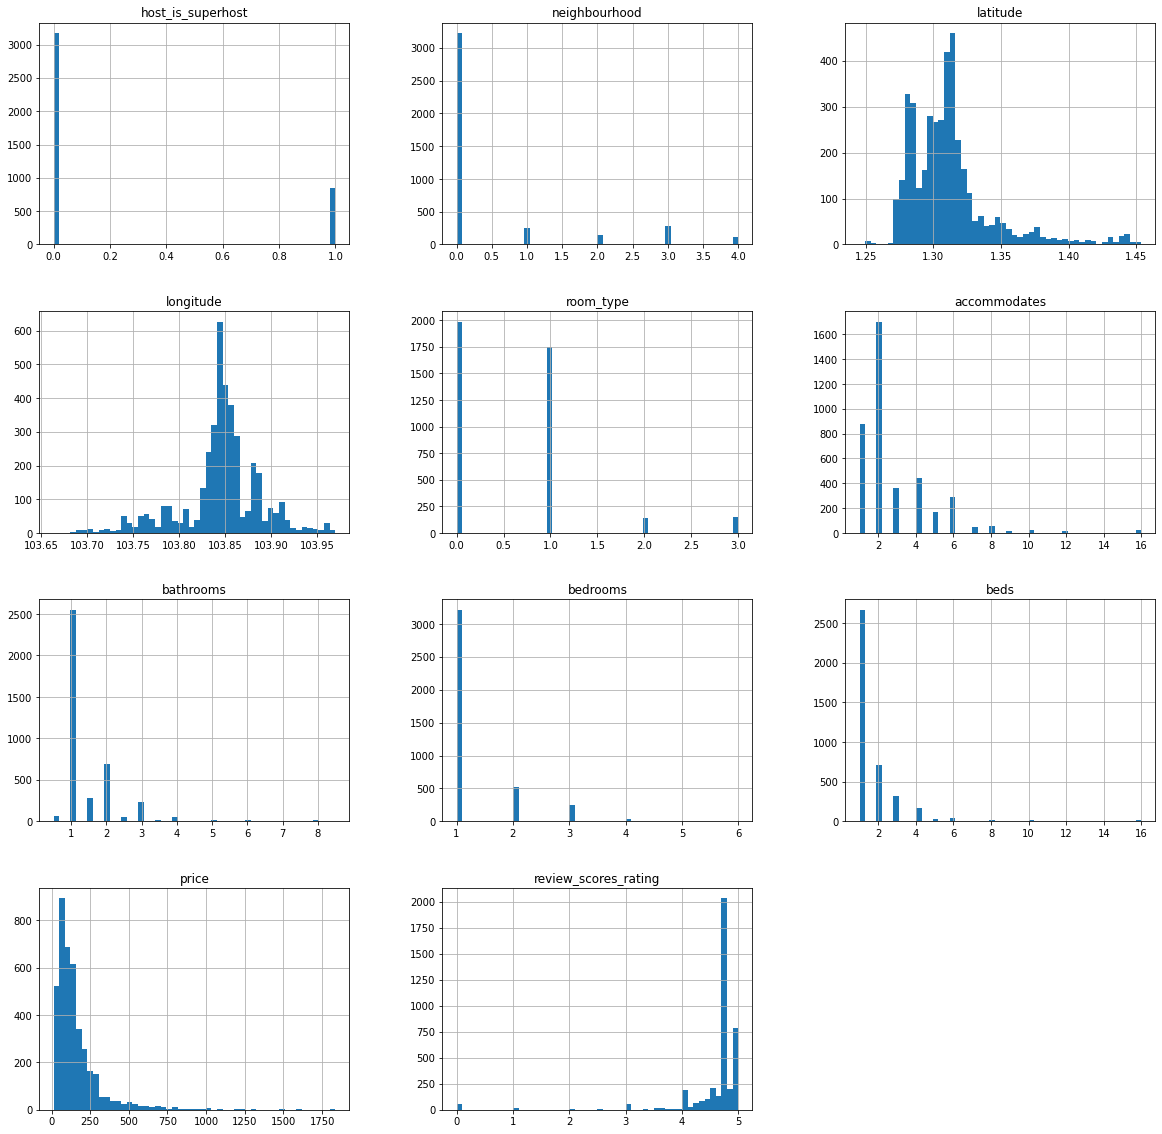

In [298]:
data_clean2.hist(bins=50,figsize=(20, 20))

In [306]:
len(data_clean) - len(data_clean2)

99

WNIOSEK: Czyszczenie danych z wartości odstających spowodowała usunięcie 99 wierszy ze zbioru

---
# Zadanie 9.

Analiza korelacji danych:

In [299]:
# macierz korelacji wg. współczynnika Pearsona
corr_matrix=data_clean2.corr()

In [300]:
corr_matrix.price.sort_values(ascending=False)

price                   1.000000
bedrooms                0.380069
accommodates            0.279468
room_type               0.159493
beds                    0.133164
review_scores_rating    0.065906
bathrooms               0.026462
longitude              -0.073047
neighbourhood          -0.078796
host_is_superhost      -0.090808
latitude               -0.137805
Name: price, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe927096c90>,
      dtype=object)

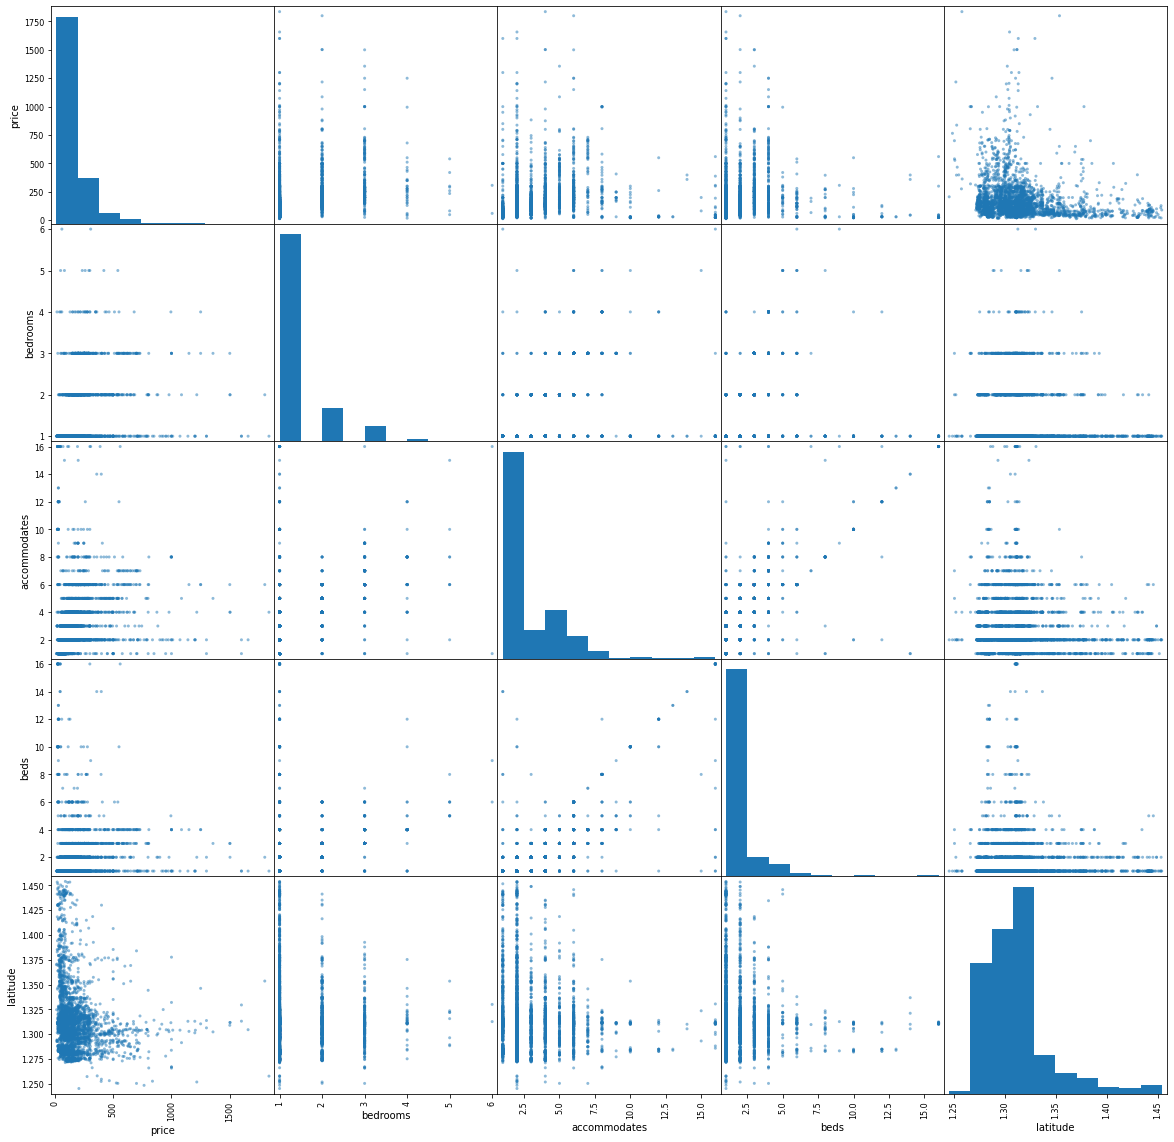

In [301]:
# wybor zmiennych ze wpłczynnikami korelacji > .10
pd.plotting.scatter_matrix(data_clean2[["price","bedrooms","accommodates","beds","latitude"]], figsize=(20, 20))

WNIOSKI:
Analiza danych umożliwiła zaoberwowanie kreleacji między paramterami w zbiorze co może posłużyć do dalszych analiz i predykcji wartości.
Np. 
1. liczba gości (accomodates) i łóżek (beds) pokazuje, że najwyższe ceny najmu wystepują dla konfiguracji z wysza liczba gości i łóżek
2. Paramter wysokości geograficznej (latitude) wykazuje ceny najmu wyższe dla wartości ~1.3
3. Liczaba sypialni (bedrooms) pokazuję  że najwyższe ceny najmu wystepują dla konfiguracją z niższa liczbą pokoji (1-3)